Fan Bu
Gold

## HW4 Exploratory Data Analysis

It's time to tie together everything we've learned so far into a more formal exploratory data anlysis. For this homework assignment, we'll use the familiar adult income dataset again. 

Each step should be supported with statistical and visaul analysis, as we walked through in each lab. 

In [189]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

df = pd.read_csv("../Datasets/adult.data", 
                 header=None,
                names=["age", "workclass", "fnlwgt", "education", "education_num", \
             "marital-status", "occupation", "relationship", "race", "sex", \
             "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"])
df.head()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [190]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## Step 1: Describe the dataset
Let us know where this dataset came from, what the columns contain, the dimensions, and any other important information about this dataset. 

In [191]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [192]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Step 2: Data Munging
- Clean up the column names as needed
- Deal with any missing values
- Encode categorical columns
- Bin the income column

In [193]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [194]:
#reformatting marita status column name 
df.rename(columns={'marital-status':'marital_status'},inplace=True)

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [195]:
df.isnull().sum() #no missing data

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [196]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [197]:
df.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [198]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [199]:
df.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [200]:
df.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [201]:
df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [202]:
df.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [203]:
#can encode education, marital statues, relationship, race, income
#start with education 
feature_edu = pd.DataFrame(df.education)
encoded_edu = pd.get_dummies(feature_edu['education'])
encoded_edu.head()

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [204]:
#marital status
feature_mari = pd.DataFrame(df.marital_status)
encoded_mari = pd.get_dummies(feature_mari['marital_status'])
encoded_mari.head()

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [205]:
#relationships
feature_rela = pd.DataFrame(df.relationship)
encoded_rela = pd.get_dummies(feature_rela['relationship'])
encoded_rela.head()

,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [206]:
#race
feature_race = pd.DataFrame(df.race)
encoded_race = pd.get_dummies(feature_race['race'])
encoded_race.head()

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0


In [207]:
#income
feature_income = pd.DataFrame(df.income)
encoded_income = pd.get_dummies(feature_income['income'])
encoded_income.head()

,<=50K,>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [208]:
#strip spaces in income column
df["income"]=df["income"].str.strip()
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [209]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [210]:
#bining income
df.loc[df.income == '<=50K', 'income'] = 0
df.loc[df.income == '>50K', 'income'] = 1
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [211]:
len(df[(df.income == 1)])

7841

In [212]:
len(df[(df.income == 0)])

24720

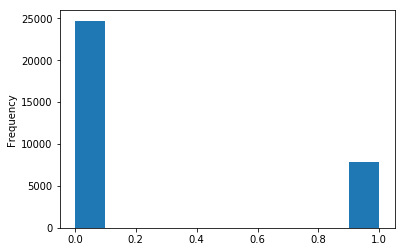

In [213]:
df.income.plot(kind='hist')

## Step 3: Scale as Needed
- Scale/standardize columns as needed
- Tell us why you did/did not choose a particular method for your dataset
- Support your decision with visualizations

In [214]:
# change rom INT64 to float
df["age"] = df.age.astype(float)
df["fnlwgt"] = df.fnlwgt.astype(float)
df["education_num"] = df.education_num.astype(float)
df["capital_gain"] = df.capital_gain.astype(float)
df["hours_per_week"] = df.hours_per_week.astype(float)
df["capital_loss"] = df.capital_loss.astype(float)
df.dtypes


age               float64
workclass          object
fnlwgt            float64
education          object
education_num     float64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
income             object
dtype: object

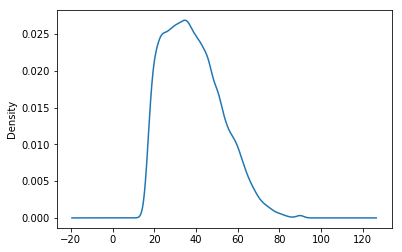

In [215]:
#start with age
%matplotlib inline
df.age.plot(kind='density')

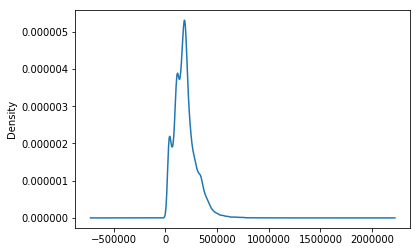

In [216]:
%matplotlib inline
df.fnlwgt.plot(kind='density')

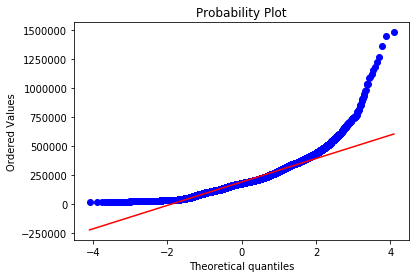

In [217]:
stats.probplot(df.fnlwgt, dist="norm", plot=plt)
plt.show()

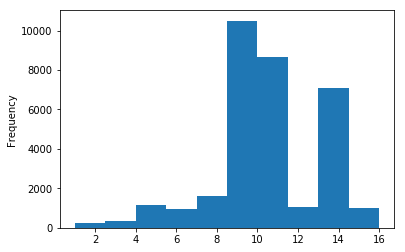

In [218]:
df.education_num.plot(kind='hist')

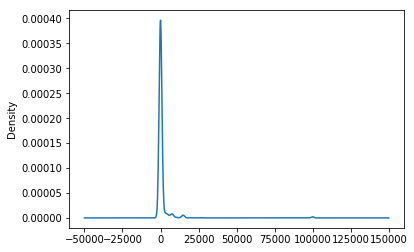

In [219]:
df.capital_gain.plot(kind='density')

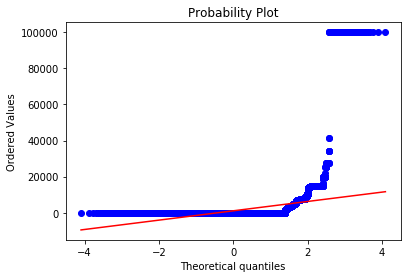

In [220]:
stats.probplot(df.capital_gain, dist="norm", plot=plt)
plt.show()

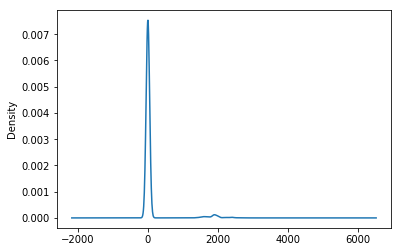

In [221]:
df.capital_loss.plot(kind='density')

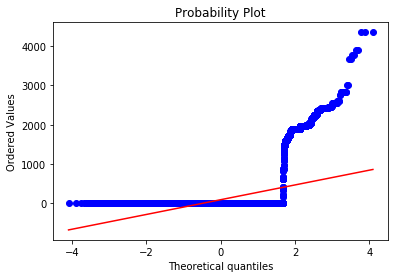

In [222]:
stats.probplot(df.capital_loss, dist="norm", plot=plt)
plt.show()

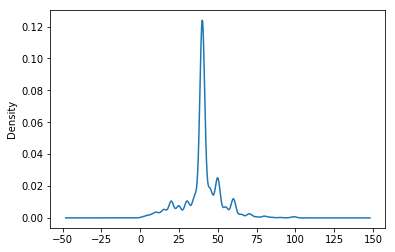

In [223]:
df.hours_per_week.plot(kind='density')

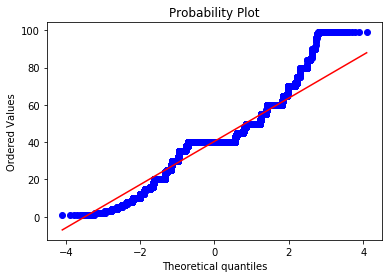

In [224]:
stats.probplot(df.hours_per_week, dist="norm", plot=plt)
plt.show()

as showing above:
- age, fnlwgt, capital gain, capital loss can use z-socre for scaling since their distribution is close 
to normal
- education num should not be standardized since it's in bins
- hours per week should use min-max scaler since its distribustion does not look normal

In [225]:
# z-score scaler for age, fnlwgt, capital gain, capital loss 
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()

df[["age","fnlwgt", "capital_gain", "capital_loss" ]] = standard_scaler.fit_transform(df[["age","fnlwgt", "capital_gain", "capital_loss" ]])

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,40.0,United-States,0
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,13.0,United-States,0
2,-0.042642,Private,0.245079,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,40.0,United-States,0
3,1.057047,Private,0.425801,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,40.0,United-States,0
4,-0.775768,Private,1.408176,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,40.0,Cuba,0


In [226]:
# min-max for hours per week
minmax_scaler = preprocessing.MinMaxScaler()

df[["hours_per_week"]]= pd.DataFrame(minmax_scaler.fit_transform(df[["hours_per_week"]]))
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,0.397959,United-States,0
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,0.122449,United-States,0
2,-0.042642,Private,0.245079,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,0.397959,United-States,0
3,1.057047,Private,0.425801,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,0.397959,United-States,0
4,-0.775768,Private,1.408176,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,0.397959,Cuba,0


## Step 4: Examine Correlation
- Plot the correlation matrix
- Pull out two variables that show the highest correlation with the income column and calculate their Person Correlatoin Coefficient

In [227]:
df["income"] = df.income.astype(float)

In [228]:
corr_mat = df.corr()

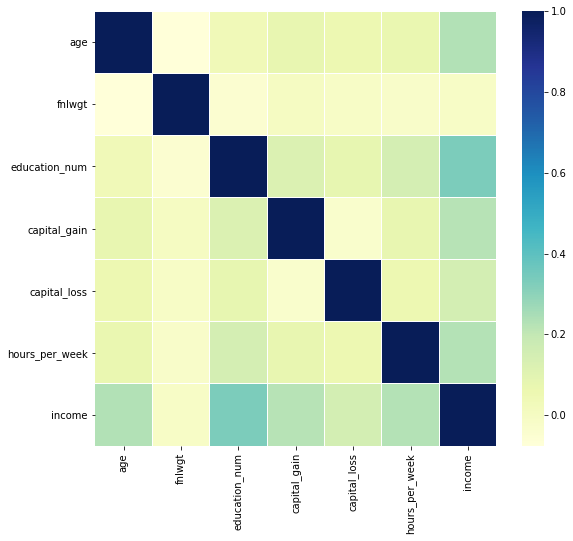

In [229]:
# plot results 
%matplotlib inline
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr_mat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [230]:
df[['education_num', 'income']].corr()

,education_num,income
education_num,1.000000,0.335154
income,0.335154,1.000000


In [231]:
df[['age', 'income']].corr()

,age,income
age,1.000000,0.234037
income,0.234037,1.000000


## Step 5: Test your predictors for normality
- For each of your top 2 columns, test the normality of the distribution
- Visualize and report test statistics

In [232]:
from scipy.stats import normaltest

# normality test
k2_stat, p = normaltest(df.education_num)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 817.1641448645273, Pvalue= 3.5897196971962224e-178
Sample does not look Gaussian (reject H0)


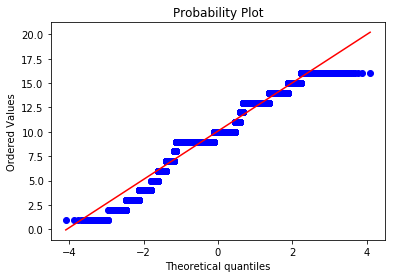

In [233]:
stats.probplot(df.education_num, dist="norm", plot=plt)
plt.show()

In [234]:
from scipy.stats import normaltest

# normality test
k2_stat, p = normaltest(df.age)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 1526.0108462557203, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


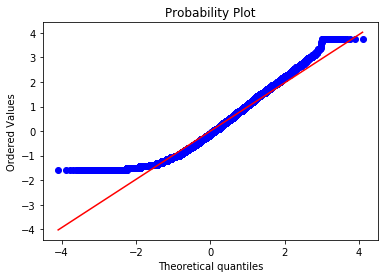

In [235]:
import scipy.stats as stats

stats.probplot(df.age, dist="norm", plot=plt)
plt.show()

## Step 6: Test for Outliers
- Find and report the number of outliers found
- Visualize and describe any patterns or lack therof
- Remove and re-examine the effect on the normality of your data

In [236]:
#for education_nume
from scipy.stats import zscore
df['Zscore_edu'] = zscore(df.education_num)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Zscore_edu
0,0.030671,State-gov,-1.063611,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,0.397959,United-States,0.0,1.134739
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,0.122449,United-States,0.0,1.134739
2,-0.042642,Private,0.245079,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,0.397959,United-States,0.0,-0.420060
3,1.057047,Private,0.425801,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,0.397959,United-States,0.0,-1.197459
4,-0.775768,Private,1.408176,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,0.397959,Cuba,0.0,1.134739


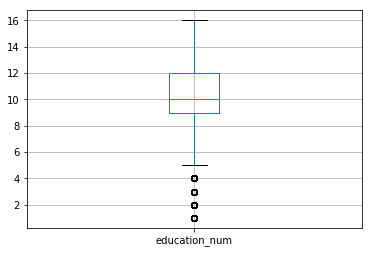

In [237]:
df.boxplot(column=['education_num'], return_type='axes')

In [238]:
len(df[abs(df.Zscore_edu) > 2.5])

552

In [250]:
#drop education_num outliers
df = df.drop(df[abs(df.Zscore_edu) > 2.5].index)
len(df[abs(df.Zscore_edu) > 2.5])

0

In [251]:
#for age
df['Zscore_age'] = zscore(df.age)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Zscore_edu,Zscore_age
0,0.030671,State-gov,-1.063611,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,0.397959,United-States,0.0,1.134739,0.075983
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,0.122449,United-States,0.0,1.134739,0.926120
2,-0.042642,Private,0.245079,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,0.397959,United-States,0.0,-0.420060,-0.001302
3,1.057047,Private,0.425801,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,0.397959,United-States,0.0,-1.197459,1.157975
4,-0.775768,Private,1.408176,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,0.397959,Cuba,0.0,1.134739,-0.774154


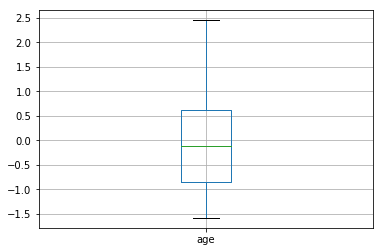

In [252]:
df.boxplot(column=['age'], return_type='axes')

In [253]:
len(df[abs(df.Zscore_age) > 2.5])

133

In [254]:
#drop age outliers
df = df.drop(df[df.Zscore_age > 2.5].index)
len(df[abs(df.Zscore_age) > 2.5])

0

In [255]:
#normality test
#education_num
from scipy.stats import normaltest
k2_stat, p = normaltest(df.education_num)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


K^2 Stat= 12.41007917312408, Pvalue= 0.00201922887285897
Sample does not look Gaussian (reject H0)


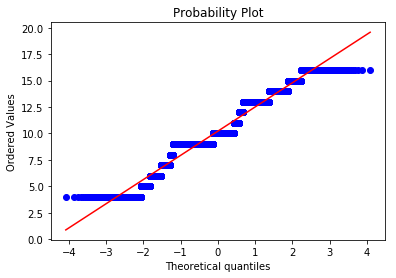

In [256]:
stats.probplot(df.education_num, dist="norm", plot=plt)
plt.show()

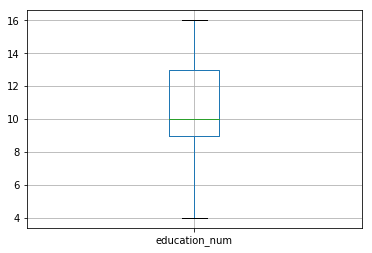

In [257]:
df.boxplot(column=['education_num'], return_type='axes')

In [258]:
#for age
k2_stat, p = normaltest(df.age)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 2277.857772909433, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


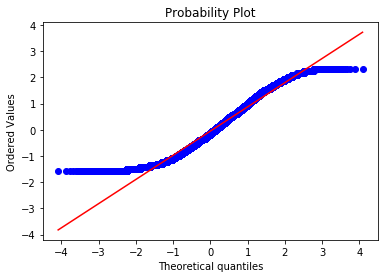

In [259]:
stats.probplot(df.age,dist="norm", plot=plt)
plt.show()

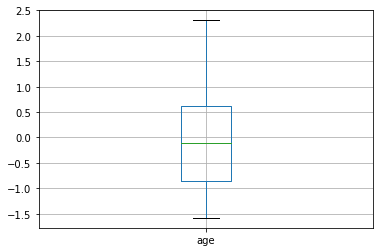

In [260]:
df.boxplot(column=['age'], return_type='axes')

## Step 7: For two points, let us know what questions you have

For categorical data,  when should we encode it? For example, for the race column, there are only a handful options; but the native country column has way more options. Should we also encode the native country column? 